In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

### Data

In [4]:
path = Path('data/big_cats'); path.ls()

[PosixPath('data/big_cats/lion'),
 PosixPath('data/big_cats/models'),
 PosixPath('data/big_cats/tiger'),
 PosixPath('data/big_cats/cheetah'),
 PosixPath('data/big_cats/urls_lion.csv'),
 PosixPath('data/big_cats/.ipynb_checkpoints'),
 PosixPath('data/big_cats/urls_tiger.csv'),
 PosixPath('data/big_cats/urls_cheetah.csv')]

In [5]:
data = ImageDataBunch.from_folder(path=path, train='.', bs=64, size=224, valid_pct=0.2, 
                                  ds_tfms=get_transforms()).normalize(imagenet_stats)

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetah', 'lion', 'tiger'], 3, 452, 112)

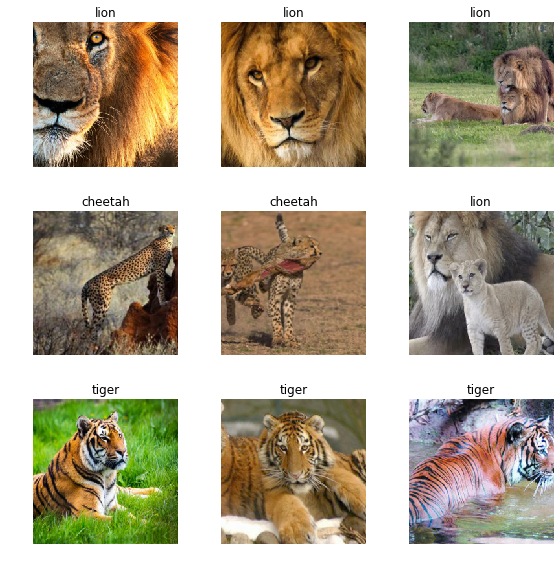

In [7]:
data.show_batch(3, figsize=(8, 8))

### Model

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


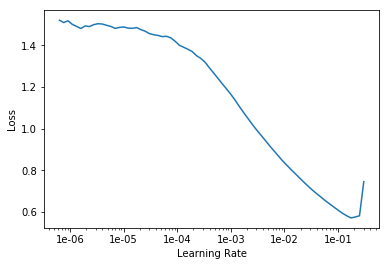

In [17]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.035292,0.073483,0.035714,00:03
1,0.033698,0.070058,0.035714,00:03


In [10]:
interpret = learn.interpret()

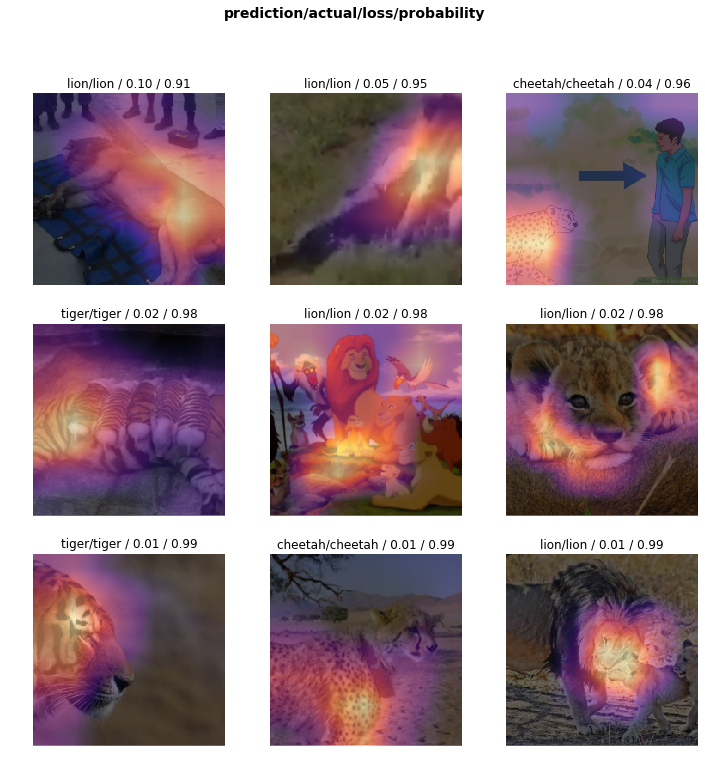

In [11]:
interpret.plot_top_losses(9)

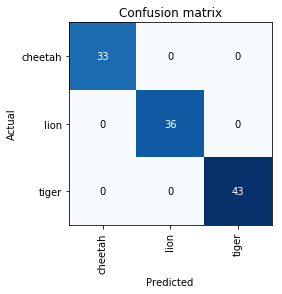

In [12]:
interpret.plot_confusion_matrix()

In [23]:
learn.save('34-stage-1')

In [13]:
learn.load('34-stage-1');